In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('archive(5)/real_estate_salto_sp_apartamento_aluguel_5.csv')

df.drop(columns='nome_casa',inplace=True)

In [77]:
df['vagas_casa'].unique()

array(['1', '2', '--', '3', '4'], dtype=object)

In [78]:
df['vagas_casa'].replace(to_replace='--', value=0, inplace=True)


In [79]:
df['vagas_casa'] = df['vagas_casa'].astype(int)

In [80]:
df['vagas_casa'].replace(to_replace=0, value=df['vagas_casa'].mean().astype(int), inplace=True)

In [81]:
df['vagas_casa'].unique()

array([1, 2, 3, 4])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   endereço_casa   175 non-null    object
 1   preco_casa      175 non-null    object
 2   metros_casa     175 non-null    int64 
 3   quartos_casa    175 non-null    int64 
 4   banheiros_casa  175 non-null    int64 
 5   vagas_casa      175 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 8.3+ KB


In [83]:
df['endereço_casa']

0      Rua Padre José de Anchieta, 86 - Vila Romão, S...
1                              Jardim Sontag, Salto - SP
2                          Parque Bela Vista, Salto - SP
3           Rua Estados Unidos, 195 - Guaraú, Salto - SP
4                                 Da Estação, Salto - SP
                             ...                        
170     Rua Rio Pardo, 74 - TERRA SANTA ROSA, Salto - SP
171                            Jardim Sontag, Salto - SP
172                                   Centro, Salto - SP
173                                   Centro, Salto - SP
174                                   Centro, Salto - SP
Name: endereço_casa, Length: 175, dtype: object

In [84]:
df['endereço_casa'].unique()

array(['Rua Padre José de Anchieta, 86 - Vila Romão, Salto - SP',
       'Jardim Sontag, Salto - SP', 'Parque Bela Vista, Salto - SP',
       'Rua Estados Unidos, 195 - Guaraú, Salto - SP',
       'Da Estação, Salto - SP', 'Vila Teixeira, Salto - SP',
       'Rua Floriano Peixoto, 1832 - Jardim das Nações, Salto - SP',
       'Rua Presidente João Café Filho, 100 - Parque Bela Vista, Salto - SP',
       'Vila Nova, Salto - SP', 'Jardim America, Salto - SP',
       'Rua Rodrigues Alves, 570 - Centro, Salto - SP',
       'Rua Joaquim Nabuco, 140 - Vila Teixeira, Salto - SP',
       'Jardim Três Marias, Salto - SP', 'Salto Ville, Salto - SP',
       'Loteamento Jardim das Constelacoes, Salto - SP',
       'Centro, Salto - SP', 'Jardim Planalto, Salto - SP',
       'Avenida Eugênio Coltro, 1925 - Salto Ville, Salto - SP',
       'Rua Rio Pardo, 74 - TERRA SANTA ROSA, Salto - SP'], dtype=object)

In [85]:
bairros = pd.get_dummies(df['endereço_casa'], dtype=int)


B = list(df['endereço_casa'])  # Convertendo a coluna 'endereço_casa' em uma lista
df['endereço_casa'] = [bairro.split(',')[-2] for bairro in B]  # Dividindo cada endereço e pegando o terceiro elemento (presumivelmente o bairro)

df

,endereço_casa,preco_casa,metros_casa,quartos_casa,banheiros_casa,vagas_casa
0,86 - Vila Romão,R$ 1.500 /mês,76,2,1,1
1,Jardim Sontag,R$ 260.000,62,2,2,1
2,Parque Bela Vista,R$ 1.800 /mês,53,2,1,1
3,195 - Guaraú,R$ 290.000,60,2,2,1
4,Da Estação,R$ 1.550 /mês,75,2,2,2
...,...,...,...,...,...,...
170,74 - TERRA SANTA ROSA,R$ 1.700 /mês,114,2,2,3
171,Jardim Sontag,R$ 1.450 /mês,70,3,2,2
172,Centro,R$ 220.000,45,2,1,1
173,Centro,R$ 2.500 /mês,126,3,2,2


In [86]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown="ignore")

encoded = pd.get_dummies(df['endereço_casa'], dtype=int)

df = pd.concat([df,encoded],axis =1)
df.drop(columns='endereço_casa',inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   preco_casa                          175 non-null    object
 1   metros_casa                         175 non-null    int64 
 2   quartos_casa                        175 non-null    int64 
 3   banheiros_casa                      175 non-null    int64 
 4   vagas_casa                          175 non-null    int64 
 5    100 - Parque Bela Vista            175 non-null    int64 
 6    140 - Vila Teixeira                175 non-null    int64 
 7    1832 - Jardim das Nações           175 non-null    int64 
 8    1925 - Salto Ville                 175 non-null    int64 
 9    195 - Guaraú                       175 non-null    int64 
 10   570 - Centro                       175 non-null    int64 
 11   74 - TERRA SANTA ROSA              175 non-null    int64 

In [87]:
df['preco_casa'].unique()

array(['R$ 1.500 /mês', 'R$ 260.000', 'R$ 1.800 /mês', 'R$ 290.000',
       'R$ 1.550 /mês', 'R$ 1.350 /mês', 'R$ 3.200 /mês', 'R$ 480.000',
       'R$ 2.000 /mês', 'R$ 2.300 /mês', 'R$ 320.000', 'R$ 2.101 /mês',
       'R$ 850 /mês', 'R$ 1.450 /mês', 'R$ 3.900 /mês', 'R$ 2.200 /mês',
       'R$ 720.000', 'R$ 4.500 /mês', 'R$ 700.000', 'R$ 4.300 /mês',
       'R$ 550.000', 'R$ 1.700 /mês', 'R$ 220.000', 'R$ 2.500 /mês',
       'R$ 270.000', 'R$ 2.100 /mês', 'R$ 1.200 /mês', 'R$ 250.000',
       'R$ 1.780 /mês', 'R$ 3.800 /mês', 'R$ 1.300 /mês', 'R$ 1.000 /mês',
       'R$ 7.400 /mês', 'R$ 1.600 /mês', 'R$ 280.000', 'R$ 3.100 /mês',
       'R$ 1.400 /mês', 'R$ 3.000 /mês', 'R$ 475.000'], dtype=object)

In [88]:
p = list(df['preco_casa'])
preco = pd.DataFrame([precin.split('R$')[1].split('/')[0] for precin in p])
#df['preco_casa'] = preco.astype(float)
preco = preco.astype(float).to_numpy()
for i in range(len(preco)):
    if preco[i] < 10:
        preco[i] = preco[i] * 1000

df['preco_casa'] = preco

In [89]:
df

,preco_casa,metros_casa,quartos_casa,banheiros_casa,vagas_casa,100 - Parque Bela Vista,140 - Vila Teixeira,1832 - Jardim das Nações,1925 - Salto Ville,195 - Guaraú,...,Da Estação,Jardim America,Jardim Planalto,Jardim Sontag,Jardim Três Marias,Loteamento Jardim das Constelacoes,Parque Bela Vista,Salto Ville,Vila Nova,Vila Teixeira
0,1500.0,76,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,260.0,62,2,2,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1800.0,53,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,290.0,60,2,2,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1550.0,75,2,2,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,1700.0,114,2,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,1450.0,70,3,2,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
172,220.0,45,2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
173,2500.0,126,3,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
X = df.iloc[:,1:]
y = df.iloc[:,0]


x0 = pd.DataFrame(np.ones(len(X)))
X = pd.concat([x0.astype(int),X],axis=1)

X.columns = X.columns.astype(str)

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
df.corr(method='pearson')

,preco_casa,metros_casa,quartos_casa,banheiros_casa,vagas_casa,100 - Parque Bela Vista,140 - Vila Teixeira,1832 - Jardim das Nações,1925 - Salto Ville,195 - Guaraú,...,Da Estação,Jardim America,Jardim Planalto,Jardim Sontag,Jardim Três Marias,Loteamento Jardim das Constelacoes,Parque Bela Vista,Salto Ville,Vila Nova,Vila Teixeira
preco_casa,1.000000,-0.106780,-0.094695,-0.044198,-0.062870,-0.075775,0.010637,-0.116081,0.033159,-0.003601,...,-0.030996,-0.042330,-0.116081,-0.042926,0.104269,-0.031042,0.094272,-0.018098,-0.028453,-0.011344
metros_casa,-0.106780,1.000000,0.754231,0.853537,0.690116,-0.050710,-0.007251,-0.026940,-0.000444,-0.018918,...,-0.029774,-0.034659,-0.013814,0.098298,-0.061701,-0.048087,-0.058081,-0.050518,-0.033503,-0.045638
quartos_casa,-0.094695,0.754231,1.000000,0.614231,0.663674,-0.011554,-0.064391,-0.064391,0.104635,-0.008049,...,-0.092432,-0.051993,0.048293,0.119750,-0.092432,-0.064391,-0.105366,-0.064391,-0.008049,-0.081430
banheiros_casa,-0.044198,0.853537,0.614231,1.000000,0.696629,-0.045793,0.051423,0.051423,0.018093,0.018093,...,0.025972,-0.021871,-0.015236,0.091808,-0.093637,-0.081895,-0.014461,-0.081895,-0.015236,-0.027202
vagas_casa,-0.062870,0.690116,0.663674,0.696629,1.000000,-0.047762,-0.059151,0.044363,0.147877,-0.059151,...,-0.047762,-0.047762,0.096120,0.048402,-0.122058,-0.059151,-0.096792,-0.059151,-0.007394,-0.044002
100 - Parque Bela Vista,-0.075775,-0.050710,-0.011554,-0.045793,-0.047762,1.000000,-0.042220,-0.042220,-0.042220,-0.042220,...,-0.060606,-0.060606,-0.042220,-0.075378,-0.060606,-0.042220,-0.088432,-0.042220,-0.042220,-0.075378
140 - Vila Teixeira,0.010637,-0.007251,-0.064391,0.051423,-0.059151,-0.042220,1.000000,-0.029412,-0.029412,-0.029412,...,-0.042220,-0.042220,-0.029412,-0.052511,-0.042220,-0.029412,-0.061604,-0.029412,-0.029412,-0.052511
1832 - Jardim das Nações,-0.116081,-0.026940,-0.064391,0.051423,0.044363,-0.042220,-0.029412,1.000000,-0.029412,-0.029412,...,-0.042220,-0.042220,-0.029412,-0.052511,-0.042220,-0.029412,-0.061604,-0.029412,-0.029412,-0.052511
1925 - Salto Ville,0.033159,-0.000444,0.104635,0.018093,0.147877,-0.042220,-0.029412,-0.029412,1.000000,-0.029412,...,-0.042220,-0.042220,-0.029412,-0.052511,-0.042220,-0.029412,-0.061604,-0.029412,-0.029412,-0.052511
195 - Guaraú,-0.003601,-0.018918,-0.008049,0.018093,-0.059151,-0.042220,-0.029412,-0.029412,-0.029412,1.000000,...,-0.042220,-0.042220,-0.029412,-0.052511,-0.042220,-0.029412,-0.061604,-0.029412,-0.029412,-0.052511


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   preco_casa                          175 non-null    float64
 1   metros_casa                         175 non-null    int64  
 2   quartos_casa                        175 non-null    int64  
 3   banheiros_casa                      175 non-null    int64  
 4   vagas_casa                          175 non-null    int64  
 5    100 - Parque Bela Vista            175 non-null    int64  
 6    140 - Vila Teixeira                175 non-null    int64  
 7    1832 - Jardim das Nações           175 non-null    int64  
 8    1925 - Salto Ville                 175 non-null    int64  
 9    195 - Guaraú                       175 non-null    int64  
 10   570 - Centro                       175 non-null    int64  
 11   74 - TERRA SANTA ROSA              175 non-n

In [101]:
df.drop(df.iloc[:,5:],axis=1, inplace = True)
df['preco_casa'].unique()

array([1500.,  260., 1800.,  290., 1550., 1350., 3200.,  480., 2000.,
       2300.,  320., 2101.,  850., 1450., 3900., 2200.,  720., 4500.,
        700., 4300.,  550., 1700.,  220., 2500.,  270., 2100., 1200.,
        250., 1780., 3800., 1300., 1000., 7400., 1600.,  280., 3100.,
       1400., 3000.,  475.])

In [95]:
df.corr(method = 'pearson')

,preco_casa,metros_casa,quartos_casa,banheiros_casa,vagas_casa
preco_casa,1.000000,-0.106780,-0.094695,-0.044198,-0.062870
metros_casa,-0.106780,1.000000,0.754231,0.853537,0.690116
quartos_casa,-0.094695,0.754231,1.000000,0.614231,0.663674
banheiros_casa,-0.044198,0.853537,0.614231,1.000000,0.696629
vagas_casa,-0.062870,0.690116,0.663674,0.696629,1.000000


In [96]:
df_t = df

'''
df_t['Dense'] = df['metros_casa']/df['banheiros_casa']
df_t.drop(columns = ['metros_casa','banheiros_casa'],axis=1,inplace=True)
'''

"\ndf_t['Dense'] = df['metros_casa']/df['banheiros_casa']\ndf_t.drop(columns = ['metros_casa','banheiros_casa'],axis=1,inplace=True)\n"

In [97]:
df_t.corr(method='pearson')

,preco_casa,metros_casa,quartos_casa,banheiros_casa,vagas_casa
preco_casa,1.000000,-0.106780,-0.094695,-0.044198,-0.062870
metros_casa,-0.106780,1.000000,0.754231,0.853537,0.690116
quartos_casa,-0.094695,0.754231,1.000000,0.614231,0.663674
banheiros_casa,-0.044198,0.853537,0.614231,1.000000,0.696629
vagas_casa,-0.062870,0.690116,0.663674,0.696629,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb510755a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb510763e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb51077550>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb51076770>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb51077340>],
 'means': []}

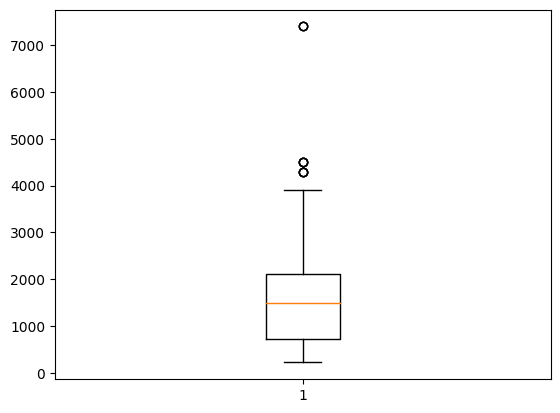

In [100]:
plt.boxplot(df['preco_casa'])